## In this notebook I'll do some Linear Regression analysis on fish market data.. let's get started with importing our packages..

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline
sns.set_style('whitegrid')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/fish-market/Fish.csv


### Reading our dataset and getting initial insights..

In [2]:
df= pd.read_csv('/kaggle/input/fish-market/Fish.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [3]:
df.tail()

,Species,Weight,Length1,Length2,Length3,Height,Width
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,13.8,15.0,16.2,2.9322,1.8792


In [4]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [5]:
df.shape

(159, 7)

### We have 7 columns
* Species: species name of fish
* Weight: weight of fish in Gram g
* Length1 : vertical length in cm
* Length2 :diagonal length in cm
* Length3 :cross length in cm
* Height: height in cm
* Width :diagonal width in cm

### our target is to predict the weight of the fish based on the other features..




In [6]:
df.Species.value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

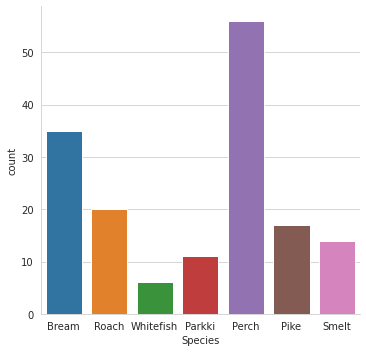

In [7]:
sns.catplot(x='Species' ,data=df,kind='count')

### Our data is imbalanced..

In [8]:
df.groupby('Species').median().sort_values('Weight',ascending=False)

,Weight,Length1,Length2,Length3,Height,Width
Species,,,,,,
Bream,610.00,30.40,33.00,38.50,14.9544,5.2801
Pike,510.00,40.10,43.00,45.80,7.2900,4.8700
Whitefish,423.00,27.05,29.50,32.40,9.7610,5.6033
Perch,207.50,23.25,25.30,26.75,6.9218,4.1549
Roach,147.50,20.50,22.25,24.85,6.5126,3.6027
Parkki,145.00,19.00,20.70,23.20,8.8928,3.2928
Smelt,9.85,11.30,11.80,13.10,2.2002,1.2731


### from the above table we notice that the features vary widely among the 8 fish species also the 'Roach' and 'Parkki' are kinda similar..

### Let's see a scatter plot to indicate th relation between features..

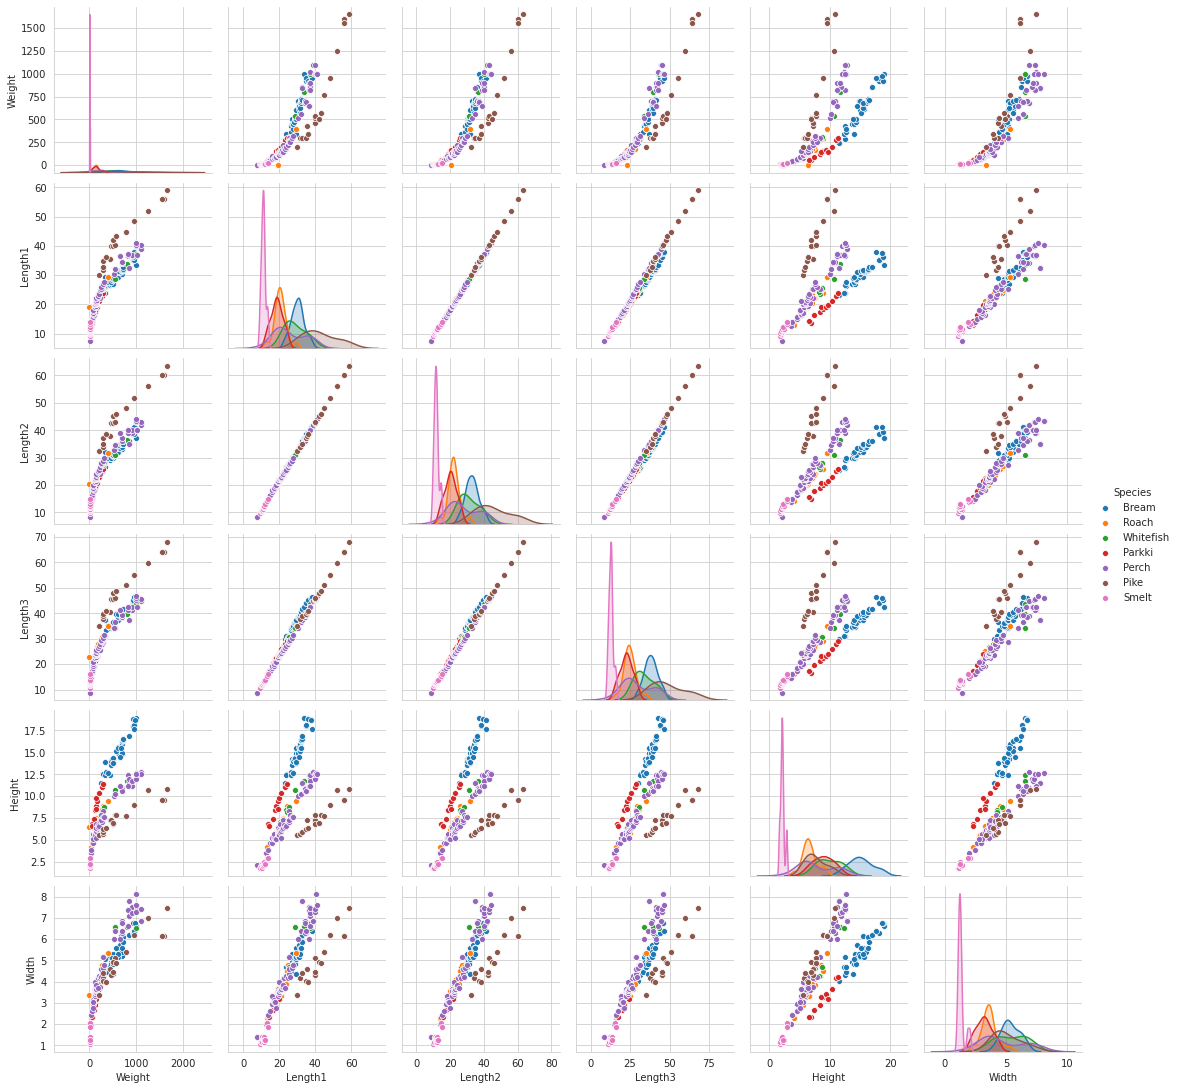

In [9]:
g=sns.pairplot(df,hue='Species')
plt.show()

### We can see that some features are highly correlated with each other so we'll drop some.
### I'll build model twice one with all the features and the other one with only Lenght1,weight and height

In [10]:
dfs=df[['Weight','Length1','Height','Width']]
std = StandardScaler()
dfs=pd.DataFrame(std.fit_transform(dfs),columns=dfs.columns)

### Since our dataset is really small I'll use cross validation..

In [11]:
X_train, X_test, y_train, y_test = train_test_split(dfs.drop('Weight',axis=1), dfs['Weight'], test_size=0.3, random_state=42)

In [12]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [15]:
print(lr.score(X_test,y_test) * 100)

86.59642849552618


In [16]:
yhat=lr.predict(X_test)
print(metrics.mean_squared_error(yhat,y_test))

0.12893219854643123


### Trying another model, RandomForestRegressor

In [17]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [18]:
print(rf.score(X_test,y_test) * 100)

96.76945139432273


In [19]:
yhatrf=rf.predict(X_test)
print(metrics.mean_squared_error(yhatrf,y_test))

0.03107542897070784
